<a href="https://colab.research.google.com/github/Ridhtang54/python-for-finance/blob/main/comparing_commodities_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

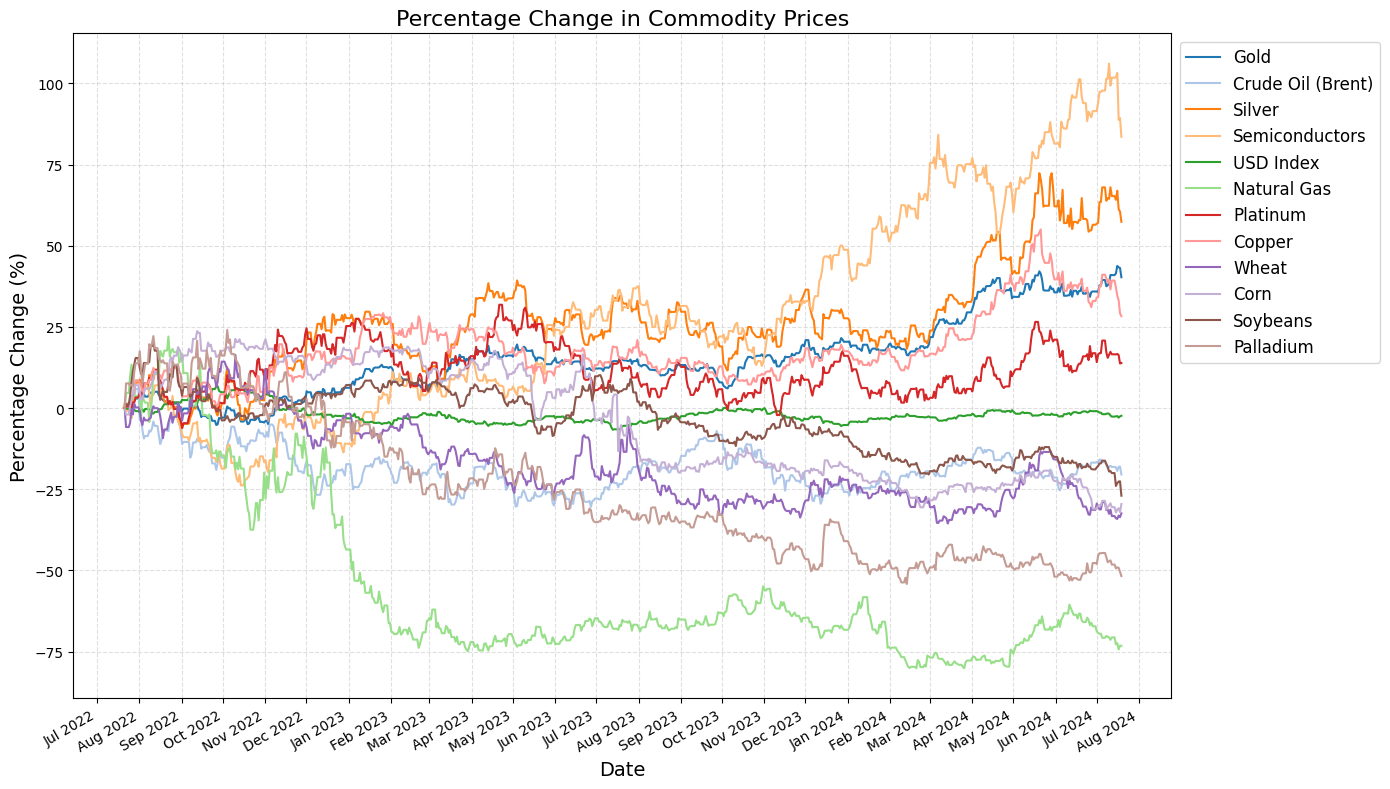

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

class commodity:
    def __init__(self, tickers, period='2y'):
        self.tickers = tickers
        self.period = period
        self.data = {}
        self.df = pd.DataFrame()

    def fetch_and_normalize(self, ticker):
        data = yf.Ticker(ticker).history(period=self.period)['Close']
        normalized = 100 * (data / data.iloc[0] - 1)
        return normalized

    def fetch_all_data(self):
        for name, ticker in self.tickers.items():
            self.data[name] = self.fetch_and_normalize(ticker)

    def reindex_data(self):
        all_indexes = [s.index for s in self.data.values()]
        common_index = pd.date_range(start=min(idx.min() for idx in all_indexes),
                                     end=max(idx.max() for idx in all_indexes),
                                     freq='D').normalize()
        self.data = {name: s.reindex(common_index).fillna(method='ffill') for name, s in self.data.items()}
        self.df = pd.DataFrame(self.data)

    def plot_data(self):
        plt.figure(figsize=(14, 8))

        colors = plt.cm.tab20.colors
        # Iterate over columns and corresponding data
        for i, (name, s) in enumerate(self.df.items()):
            plt.plot(self.df.index, self.df[name], label=name,
                     color=colors[i % len(colors)], linestyle='-', linewidth=1.5)

        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Percentage Change (%)', fontsize=14)
        plt.title('Percentage Change in Commodity Prices', fontsize=16)

        plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.gcf().autofmt_xdate()

        plt.grid(True, linestyle='--', alpha=0.4)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
        plt.tight_layout()
        plt.show()

commodities = {
    'Gold': 'GC=F',
    'Crude Oil (Brent)': 'BZ=F',
    'Silver': 'SI=F',
    'Semiconductors': 'SOXX',
    'USD Index': 'DX-Y.NYB',
    'Natural Gas': 'NG=F',
    'Platinum': 'PL=F',
    'Copper': 'HG=F',
    'Wheat': 'ZW=F',
    'Corn': 'ZC=F',
    'Soybeans': 'ZS=F',
    'Palladium': 'PA=F'
}

# Instantiate the class
comm = commodity(tickers=commodities)
comm.fetch_all_data()
comm.reindex_data()
comm.plot_data() # This now plots all commodities on a single graph